# Выводы

1. лучше собирать разметку как можно чаще, а затем склеить и ещё раз нарзать
2. возможно лучше снять все ограничения с arduino


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.signal import argrelmin, argrelmax

In [6]:
datasets_folder = "../datasets/"

In [7]:
dataset_3 = pd.read_csv(datasets_folder + "dataset_3.csv", index_col=0)
dataset_3.head()

,palmBase_x,palmBase_y,palmBase_z,thumb1_x,thumb1_y,thumb1_z,thumb2_x,thumb2_y,thumb2_z,thumb3_x,...,e90,e91,e92,e93,e94,e95,e96,e97,e98,e99
0,80.420688,377.592438,-0.001548,149.374880,356.297949,-4.103198,202.565372,301.797479,-5.569788,241.844779,...,422.0,416.0,415.0,423.0,423.0,417.0,405.0,412.0,411.0,403.0
1,110.621197,362.817404,-0.000964,171.488353,344.784483,-13.536230,213.545279,290.563742,-15.920309,197.287569,...,374.0,381.0,382.0,377.0,374.0,379.0,385.0,378.0,381.0,385.0
2,133.831678,344.170393,-0.000395,189.777625,353.152273,-0.150721,237.681508,317.246519,0.195653,266.015525,...,396.0,400.0,400.0,394.0,393.0,399.0,394.0,390.0,0.0,0.0
3,128.460390,350.709933,-0.001713,181.869894,352.623052,-15.213146,233.693253,320.682299,-24.862064,270.661270,...,369.0,369.0,362.0,359.0,366.0,366.0,359.0,357.0,359.0,366.0
4,101.490308,363.238240,-0.001209,159.770137,359.100482,-4.726096,216.348269,322.170790,-7.722144,263.068047,...,397.0,400.0,393.0,390.0,395.0,399.0,394.0,390.0,391.0,398.0


In [119]:
dataset_1 = pd.read_csv(datasets_folder + "dataset.csv", index_col=0)
# dataset_1.head()
dataset_2 = pd.read_csv(datasets_folder + "dataset_2.csv", index_col=0)
# dataset_1.head()

In [120]:
dataset_1.columns[:65]

Index(['palmBase_x', 'palmBase_y', 'palmBase_z', 'thumb1_x', 'thumb1_y',
       'thumb1_z', 'thumb2_x', 'thumb2_y', 'thumb2_z', 'thumb3_x', 'thumb3_y',
       'thumb3_z', 'thumb4_x', 'thumb4_y', 'thumb4_z', 'indexFinger1_x',
       'indexFinger1_y', 'indexFinger1_z', 'indexFinger2_x', 'indexFinger2_y',
       'indexFinger2_z', 'indexFinger3_x', 'indexFinger3_y', 'indexFinger3_z',
       'indexFinger4_x', 'indexFinger4_y', 'indexFinger4_z', 'middleFinger1_x',
       'middleFinger1_y', 'middleFinger1_z', 'middleFinger2_x',
       'middleFinger2_y', 'middleFinger2_z', 'middleFinger3_x',
       'middleFinger3_y', 'middleFinger3_z', 'middleFinger4_x',
       'middleFinger4_y', 'middleFinger4_z', 'ringFinger1_x', 'ringFinger1_y',
       'ringFinger1_z', 'ringFinger2_x', 'ringFinger2_y', 'ringFinger2_z',
       'ringFinger3_x', 'ringFinger3_y', 'ringFinger3_z', 'ringFinger4_x',
       'ringFinger4_y', 'ringFinger4_z', 'pinky1_x', 'pinky1_y', 'pinky1_z',
       'pinky2_x', 'pinky2_y', 'pinky2_

In [121]:
dataset_3.describe()

,palmBase_x,palmBase_y,palmBase_z,thumb1_x,thumb1_y,thumb1_z,thumb2_x,thumb2_y,thumb2_z,thumb3_x,...,e90,e91,e92,e93,e94,e95,e96,e97,e98,e99
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.00000,53.000000,53.000000,53.000000
mean,105.267794,357.668579,-0.001083,168.113927,353.589463,-9.140111,218.511766,313.391584,-11.243295,237.321238,...,359.301887,351.245283,343.377358,342.754717,343.320755,343.660377,336.90566,336.245283,328.735849,313.660377
std,9.623281,11.772287,0.000435,8.465594,4.857181,7.515178,7.393827,8.609134,11.618435,23.814688,...,118.137564,127.682585,136.077357,135.860492,136.135929,136.271638,144.12338,143.858759,150.828246,162.621427
min,80.420688,324.342434,-0.001874,149.374880,340.859610,-21.470606,202.565372,290.563742,-30.675484,197.287569,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,100.315229,354.177810,-0.001400,162.546016,351.187221,-15.026034,213.270798,308.014301,-18.811329,213.029785,...,384.000000,382.000000,382.000000,381.000000,379.000000,383.000000,384.00000,378.000000,377.000000,370.000000
50%,104.816245,360.614632,-0.001104,167.227809,354.157348,-10.491909,218.748884,315.668606,-14.071639,243.438143,...,396.000000,393.000000,393.000000,393.000000,395.000000,393.000000,394.00000,393.000000,393.000000,392.000000
75%,110.749784,363.238240,-0.000926,173.932196,356.491361,-5.058350,222.380392,319.253614,-6.770664,257.251286,...,401.000000,402.000000,403.000000,403.000000,402.000000,402.000000,402.00000,403.000000,400.000000,399.000000
max,133.831678,394.656430,-0.000077,189.777625,364.072266,18.695902,237.681508,330.102315,37.532558,271.963943,...,448.000000,451.000000,445.000000,442.000000,445.000000,449.000000,448.00000,439.000000,445.000000,443.000000


In [122]:
anotations_short = {
            -1: "palmBase",
            0: "thumb",
            1: "indexFinger",
            2: "middleFinger",
            3: "ringFinger",
            4: "pinky"
        }


In [54]:
def get_hand_data(ds):
    palmBase_x = ds.palmBase_x.tolist()
    palmBase_y = ds.palmBase_y.tolist()
    thumb_x = ds.thumb4_x.tolist()
    thumb_y = ds.thumb4_y.tolist()
    indexFinger_x = ds.indexFinger4_x.tolist()
    indexFinger_y = ds.indexFinger4_y.tolist()
    middleFinger_x = ds.middleFinger4_x.tolist()
    middleFinger_y = ds.middleFinger4_y.tolist()
    ringFinger_x = ds.ringFinger4_x.tolist()
    ringFinger_y = ds.ringFinger4_y.tolist()
    pinky_x = ds.pinky4_x.tolist()
    pinky_y = ds.pinky4_y.tolist()
    return palmBase_x,palmBase_y, thumb_x,thumb_y, indexFinger_x,indexFinger_y, middleFinger_x,middleFinger_y, ringFinger_x,ringFinger_y, pinky_x,pinky_y


In [139]:
pb_1_x,pb_1_y,  t_1_x,t_1_y,  if_1_x,if_1_y,  mf_1_x,mf_1_y,  rf_1_x,rf_1_y,  pf_1_x, pf_1_y = get_hand_data(dataset_1)

In [140]:
pb_2_x,pb_2_y,  t_2_x,t_2_y,  if_2_x,if_2_y,  mf_2_x,mf_2_y,  rf_2_x,rf_2_y,  pf_2_x, pf_2_y = get_hand_data(dataset_2)

In [12]:
palmBase_x = dataset_3.palmBase_x.tolist()
palmBase_y = dataset_3.palmBase_y.tolist()
thumb_x = dataset_3.thumb4_x.tolist()
thumb_y = dataset_3.thumb4_y.tolist()
indexFinger_x = dataset_3.indexFinger4_x.tolist()
indexFinger_y = dataset_3.indexFinger4_y.tolist()
middleFinger_x = dataset_3.middleFinger4_x.tolist()
middleFinger_y = dataset_3.middleFinger4_y.tolist()
ringFinger_x = dataset_3.ringFinger4_x.tolist()
ringFinger_y = dataset_3.ringFinger4_y.tolist()
pinky_x = dataset_3.pinky4_x.tolist()
pinky_y = dataset_3.pinky4_y.tolist()


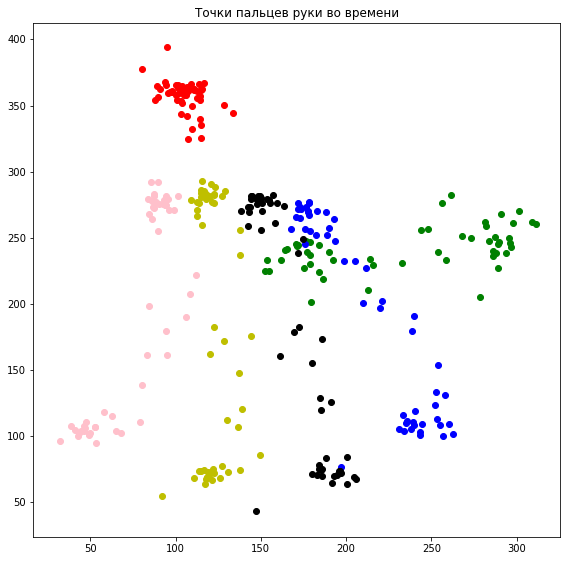

In [248]:
plt.scatter(palmBase_x, palmBase_y, c="r")
plt.scatter(thumb_x, thumb_y, c="g")
plt.scatter(indexFinger_x, indexFinger_y, c="blue")
plt.scatter(middleFinger_x, middleFinger_y, c="black")
plt.scatter(ringFinger_x, ringFinger_y, c="y")
plt.scatter(pinky_x, pinky_y, c="pink")

# plt.savefig("Base_finger_end.jpg")
plt.title("Точки пальцев руки во времени")
plt.show()

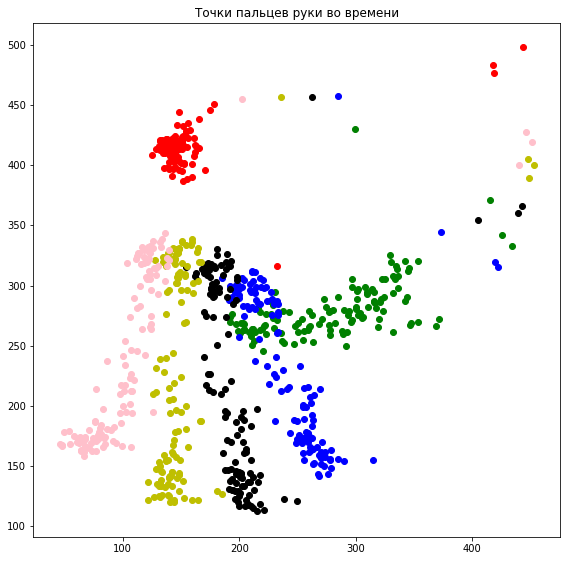

In [246]:
plt.scatter(pb_1_x, pb_1_y, c="r")
plt.scatter(t_1_x, t_1_y, c="g")
plt.scatter(if_1_x, if_1_y, c="blue")
plt.scatter(mf_1_x, mf_1_y, c="black")
plt.scatter(rf_1_x, rf_1_y, c="y")
plt.scatter(pf_1_x, pf_1_y, c="pink")

# plt.savefig("Base_finger_end.jpg")
plt.title("Точки пальцев руки во времени")
plt.show()

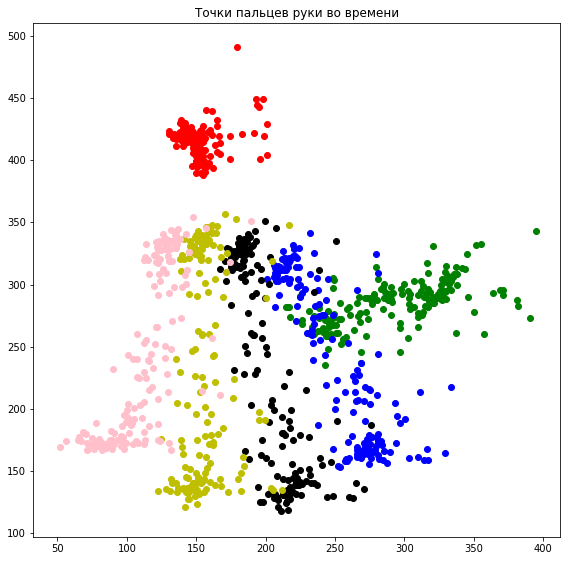

In [247]:
plt.scatter(pb_2_x, pb_2_y, c="r")
plt.scatter(t_2_x, t_2_y, c="g")
plt.scatter(if_2_x, if_2_y, c="blue")
plt.scatter(mf_2_x, mf_2_y, c="black")
plt.scatter(rf_2_x, rf_2_y, c="y")
plt.scatter(pf_2_x, pf_2_y, c="pink")

# plt.savefig("Base_finger_end.jpg")
plt.title("Точки пальцев руки во времени")
plt.show()

In [14]:
# euclidean([palmBase_x[0], palmBase_y[0]], [indexFinger_x[0], indexFinger_y[0]])
bending_dist_base_indexFinger = []
bending_dist_base_thumb = []
bending_dist_base_middleFinger = []
bending_dist_base_ringFinger = []
bending_dist_base_pinky = []

for i in range(len(palmBase_x)):
    bending_dist_base_indexFinger.append(euclidean([palmBase_x[i], palmBase_y[i]], [indexFinger_x[i], indexFinger_y[i]]))
    bending_dist_base_thumb.append(euclidean([palmBase_x[i], palmBase_y[i]], [thumb_x[i], thumb_y[i]]))
    bending_dist_base_middleFinger.append(euclidean([palmBase_x[i], palmBase_y[i]], [middleFinger_x[i], middleFinger_y[i]]))
    bending_dist_base_ringFinger.append(euclidean([palmBase_x[i], palmBase_y[i]], [ringFinger_x[i], ringFinger_y[i]]))
    bending_dist_base_pinky.append(euclidean([palmBase_x[i], palmBase_y[i]], [pinky_x[i], pinky_y[i]]))
    
    

In [68]:
def get_dist_base_index(base_x, base_y, indexFinger_x, indexFinger_y):
    base_indexFinger = []
    for i in range(len(base_x)):
        base_indexFinger.append( euclidean([base_x[i], base_y[i]], [indexFinger_x[i], indexFinger_y[i]]) )
    return base_indexFinger

In [125]:
bending_dist_b1_if1 = get_dist_base_index(pb_1_x, pb_1_y, if_1_x, if_1_y)
bending_dist_b2_if2 = get_dist_base_index(pb_2_x, pb_2_y, if_2_x, if_2_y)

# bending_dist_b1_if1

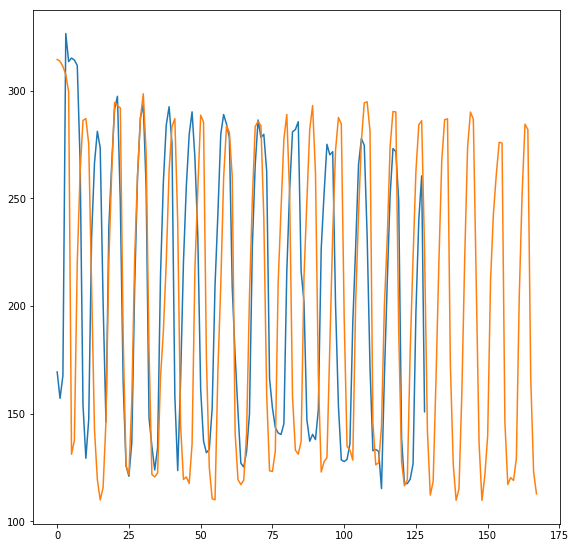

In [196]:
plt.plot(bending_dist_b1_if1)
plt.plot(bending_dist_b2_if2)
plt.show()

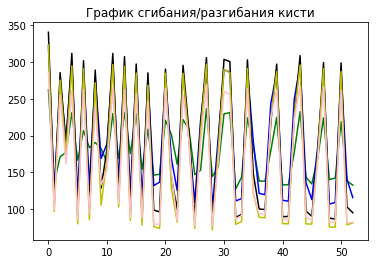

In [15]:
plt.plot(bending_dist_base_thumb, c="g")
plt.plot(bending_dist_base_indexFinger, c="blue")
plt.plot(bending_dist_base_middleFinger, c="black")
plt.plot(bending_dist_base_ringFinger, c="y")
plt.plot(bending_dist_base_pinky, c="pink")
plt.title("График сгибания/разгибания кисти")
plt.show()
# plt.savefig("Bending_grah.jpg")

In [16]:
signals = []
def collect_signals(data_frame, amount=100,  prefix="e"):
    result = data_frame.loc[:,'e0':'e'+str(amount-1)]
    return result.to_numpy()

In [106]:
signals = collect_signals(dataset_3, amount=100)
signals_1 = collect_signals(dataset_1, amount=100)
signals_2 = collect_signals(dataset_2, amount=100)


In [94]:
def concat_signals(data):
    result = []
    for i, batch in enumerate(data):
        try:
            first_zero_index = list(batch).index(0)
        except:
            first_zero_index = -1
        for r in batch[:first_zero_index]:
            result.append(r)
    return result

def concat_signals_lables(data, lables_data, bias=400):
    result = []
    lables_res = []
    for i, batch in enumerate(data):
        try:
            first_zero_index = list(batch).index(0)
        except:
            first_zero_index = -1
        for r in batch[:first_zero_index]:
            lables_res.append((lables_data[i] * 50) + bias)
            result.append(r)
    return result, lables_res

def concat_signals_lables_ground(data, lables_data):
    result = []
    lables_res = []
    for i, batch in enumerate(data):
        try:
            first_zero_index = list(batch).index(0)
        except:
            first_zero_index = -1
        for r in batch[:first_zero_index]:
            lables_res.append(lables_data[i])
            result.append(r)
    return result, lables_res

In [102]:
def is_bend(data_bend, threshold=200, bias=25):
    result = []
    for d in data_bend:
#         result.append(d > threshold)
        if d > (threshold + bias):
            result.append(1)
        elif d < (threshold - bias):
            result.append(-1)
        else:
            result.append(0)
    return result

In [250]:
def get_bend_not_bend_index_lables(lables_data, bias=0): #not ground
    current = lables_data[0]
    start = 0
    left_bias = 0
    right_bias = bias
    bend_index = []
    not_bend_index = []
    for i,each in enumerate(lables_data[1:]):
        if each != current:
            if (len(lables_data[1:]) - i) < bias:
                right_bias = 0
            if each > current:
                not_bend_index.append((start - left_bias, i + right_bias))
            else:
                bend_index.append((start - left_bias, i + right_bias))
            start = i
            left_bias = bias
        current = each
    return bend_index, not_bend_index

In [251]:
bend_ds1 = is_bend(bending_dist_b1_if1, bias=0)
big_signal_1, big_label_1 = concat_signals_lables(signals_1, bend_ds1, 280)
big_signal_1, big_label_1_ground = concat_signals_lables_ground(signals_1, bending_dist_b1_if1)


In [262]:
bend_index, not_bend_index = get_bend_not_bend_index_lables(big_label_1, 10)

In [265]:
for each in bend_index:
    d = auto_norm( big_signal_1[each[0] : each[1]], 30)
    d = auto_local_avg(d[0],d[1])
    print(d[0], d[-1], d[-1]-d[0], each)

275.5 254.5 -21.0 (183, 417)
311.0 259.0 -52.0 (487, 723)
307.5 319.0 11.5 (726, 885)
335.5 319.0 -16.5 (990, 1182)
324.5 260.0 -64.5 (1276, 1464)
313.5 274.0 -39.5 (1582, 1755)
316.5 245.5 -71.0 (1898, 2112)
332.5 271.0 -61.5 (2252, 2458)
338.5 267.0 -71.5 (2597, 2834)
310.0 263.0 -47.0 (2955, 3143)
289.5 268.0 -21.5 (3309, 3471)
303.0 261.0 -42.0 (3608, 3771)
307.0 266.5 -40.5 (3929, 3988)


In [261]:
for each in bend_index:
    d = auto_norm( big_signal_1[each[0] : each[1]], 30)
    d = auto_local_avg(d[0],d[1])
    print(d[0], d[-1], d[-1]-d[0], each)

275.5 254.5 -21.0 (193, 407)
311.0 259.0 -52.0 (497, 713)
308.5 266.5 -42.0 (736, 875)
335.5 319.0 -16.5 (1000, 1172)
321.5 255.0 -66.5 (1286, 1454)
313.5 274.0 -39.5 (1592, 1745)
302.5 275.0 -27.5 (1908, 2102)
332.5 271.0 -61.5 (2262, 2448)
338.5 267.0 -71.5 (2607, 2824)
310.0 263.0 -47.0 (2965, 3133)
331.0 252.5 -78.5 (3319, 3461)
330.0 269.5 -60.5 (3618, 3761)
300.0 278.0 -22.0 (3939, 3978)


In [272]:
for each in not_bend_index:
    d = auto_norm( big_signal_1[each[0] : each[1]], 30)
    d = auto_local_avg(d[0],d[1])
    print(d[0], d[-1], d[-1]-d[0])

277.0 297.0 20.0
232.5 331.0 98.5
274.0 307.5 33.5
268.5 326.0 57.5
233.0 340.0 107.0
248.0 315.0 67.0
244.0 311.0 67.0
263.5 285.0 21.5
290.5 285.5 -5.0
304.5 324.5 20.0
260.5 303.0 42.5
238.0 265.0 27.0
234.5 315.5 81.0


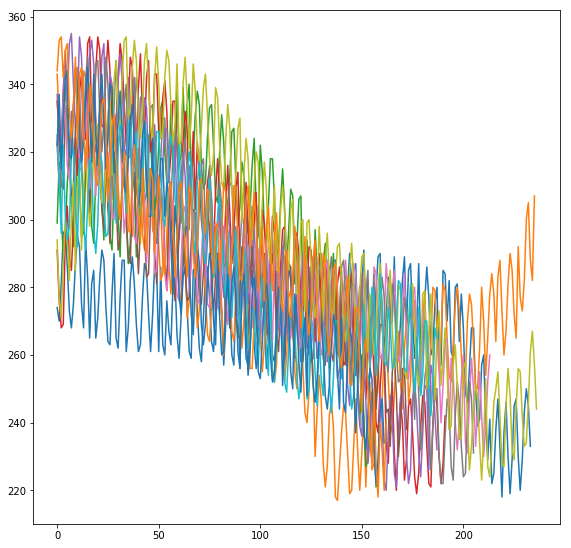

In [268]:
for each in bend_index:
    d = auto_norm( big_signal_1[each[0] : each[1]], 30)
    d = auto_local_avg(d[0],d[1])
#     plt.plot(d) 
    d = big_signal_1[each[0] : each[1]]
    if len(d) > 150:
        plt.plot(d)   
plt.show()

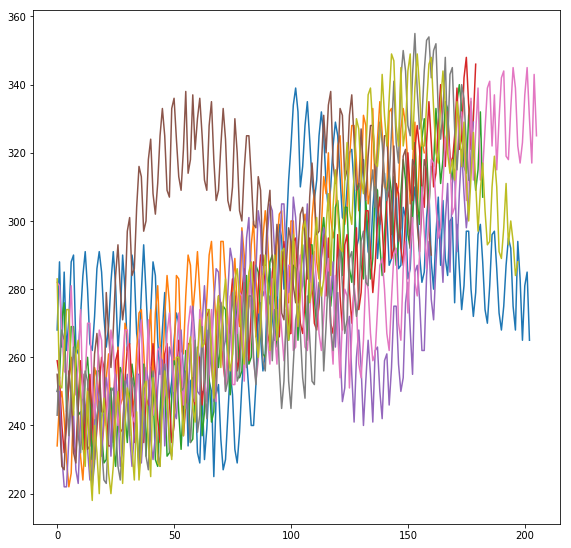

In [271]:
for each in not_bend_index:
    d = auto_norm( big_signal_1[each[0] : each[1]], 30)
    d = auto_local_avg(d[0],d[1])
#     plt.plot(d) 
    d = big_signal_1[each[0] : each[1]]
    if len(d) > 150:
        plt.plot(d)   
plt.show()

In [201]:
start = 0
end = -1

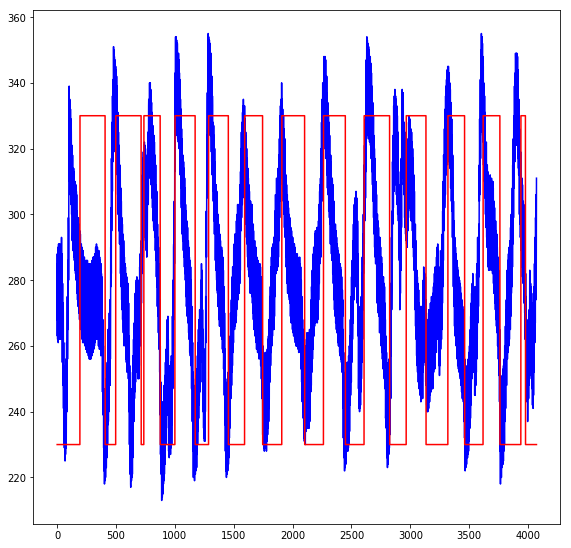

In [273]:
plt.plot(big_signal_1[start:end], c="b")
plt.plot(big_label_1[start:end], c="r")
# plt.plot(big_label_1_ground[start:end], c="g")
# plt.rcParams['figure.figsize'] = [24/2.54, 24/2.54]
plt.show()

In [134]:
bend_ds2 = is_bend(bending_dist_b2_if2, bias=20)
big_signal_2, big_label_2 = concat_signals_lables(signals_2, bend_ds2, 400)
big_signal_2, big_label_2_ground = concat_signals_lables_ground(signals_2, bending_dist_b2_if2)


In [135]:
start = 0
end = -1

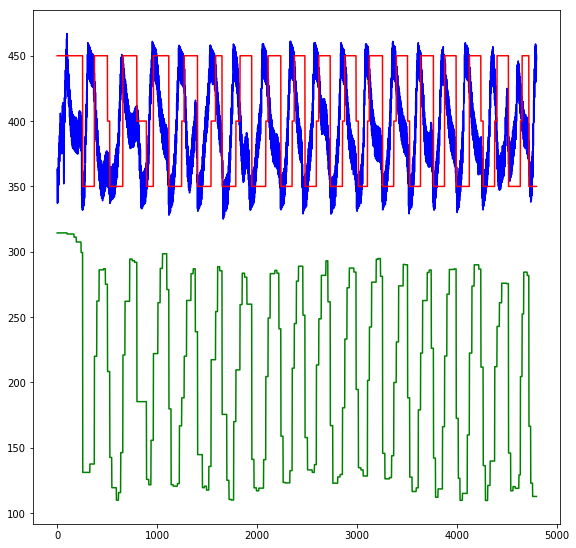

In [136]:
plt.plot(big_signal_2[start:end], c="b")
plt.plot(big_label_2[start:end], c="r")
plt.plot(big_label_2_ground[start:end], c="g")
plt.rcParams['figure.figsize'] = [24/2.54, 24/2.54]
plt.show()

In [137]:
# big_signal = concat_signals(signals)
bend_base_index = is_bend(bending_dist_base_indexFinger, bias=10)
big_signal, big_label = concat_signals_lables(signals, bend_base_index)
big_signal, big_label_ground = concat_signals_lables_ground(signals, bending_dist_base_indexFinger)

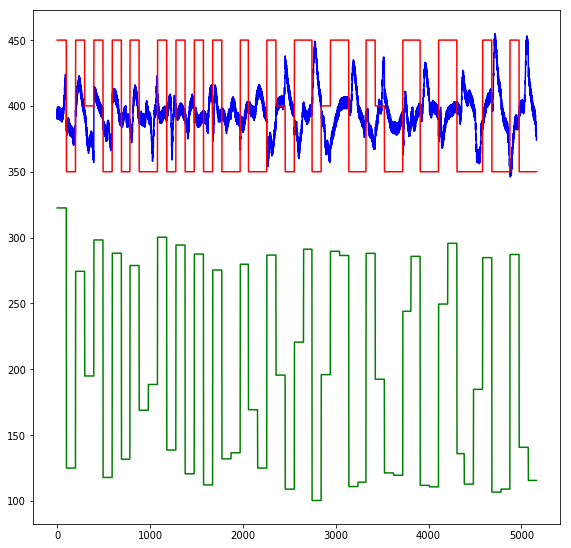

In [138]:
plt.plot(big_signal, c="b")
plt.plot(big_label, c="r")
plt.plot(big_label_ground, c="g")
plt.rcParams['figure.figsize'] = [24/2.54, 24/2.54]
plt.show()

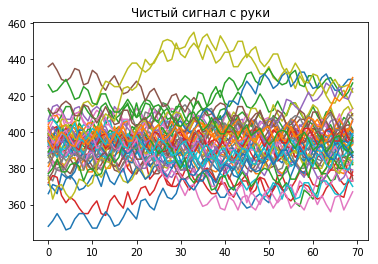

In [14]:
for i, s in enumerate(signals):
    plt.plot(s)
plt.title("Чистый сигнал с руки")
plt.show()

In [15]:
def get_log_signals(data):
    result = []
    for res in data:
        tmp = []
        for r in res:
            tmp.append(np.log(r))
        result.append(tmp)
    return result

In [16]:
signals_log = get_log_signals(signals)

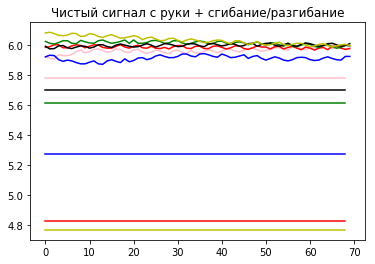

In [17]:
colors = ['r', 'g', "b", "black", "y", "pink"]
for i, s in enumerate(signals_log[20:26]):
    plt.plot(s, c=colors[(i % len(colors)) -1])
    plt.plot([np.log(bending_dist_base_indexFinger[i]) for _ in range(len(s)-1)], c=colors[(i % len(colors)) -1] )
plt.title("Чистый сигнал с руки + сгибание/разгибание")
plt.show()

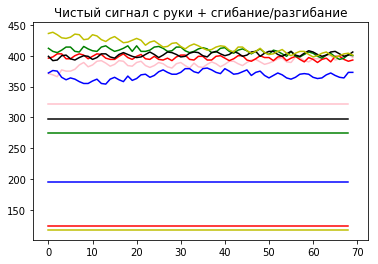

In [18]:
colors = ['r', 'g', "b", "black", "y", "pink"]
for i, s in enumerate(signals[20:26]):
    plt.plot(s, c=colors[(i % len(colors)) -1])
    plt.plot([bending_dist_base_indexFinger[i] for _ in range(len(s)-1)], c=colors[(i % len(colors)) -1] )
plt.title("Чистый сигнал с руки + сгибание/разгибание")
plt.show()

In [19]:
def is_bend(data_bend, threshold=200, bias=25):
    result = []
    for d in data_bend:
#         result.append(d > threshold)
        if d > (threshold + bias):
            result.append(-1)
        elif d < (threshold - bias):
            result.append(1)
        else:
            result.append(0)
    return result

In [20]:
is_bend_base_indexFinger = is_bend(bending_dist_base_indexFinger, bias=50)

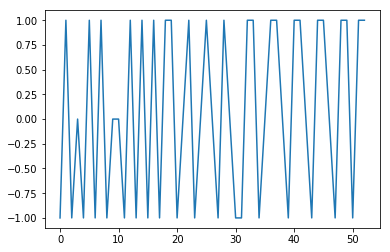

In [21]:
plt.plot(is_bend_base_indexFinger)
plt.show()

In [22]:
# for i in range(len(is_bend_base_indexFinger)):
#     diff_start_end = signals[i][-1] - signals[i][0]
#     diff_max_min = max(signals[i]) - min(signals[i])
#     print("{:2d}".format(is_bend_base_indexFinger[i]),
#           "{:3.0f}".format(diff_start_end), 
#           "{:3.0f}".format(diff_max_min),
#           "{:3.0f}".format(np.average(signals[i])))

In [216]:
def auto_norm(data, threshold=30):
        res_min = np.array(data)
        res_max = np.array(data)
        # удивительно, но медиана уровня дом дереа работает и очень даже неплохо
#         threshold = int(np.median(res))
#         print(threshold)
        cnt = len(res_min)
        indexes = [i for i in range(len(data))]
        indexes_max = np.array(indexes)
        indexes_min = np.array(indexes)
        def f(res_min, res_max, indexes_min, indexes_max):
            while len(indexes_min) > threshold:
                minInd = argrelmin(res_min)
                res_min = res_min[minInd]
                indexes_min = indexes_min[minInd]
            while len(indexes_max) > threshold:
                maxInd = argrelmax(res_max)
                res_max = res_max[maxInd]
                indexes_max = indexes_max[maxInd]
            return res_min, res_max, indexes_min, indexes_max
        res_min, res_max, indexes_min, indexes_max = f(res_min, res_max, indexes_min, indexes_max)
        return res_min, res_max, indexes_min, indexes_max

In [221]:
def auto_local_avg(data_max, data_min):
    res = []
#     print("data_max, data_min: ", data_max, data_min)
    length = min(len(list(data_max)), len(list(data_min)))
    for i in range(length):
        t = (data_max[i] + data_min[i])/2
        res.append(t)
    return res

In [ ]:
## res_signal_min_0, res_signal_max_0, _, _ = auto_norm(signals[0])
res_signal_min_1, res_signal_max_1, _, _ = auto_norm(signals[1])

In [29]:
len(res_signal_min_0)

15

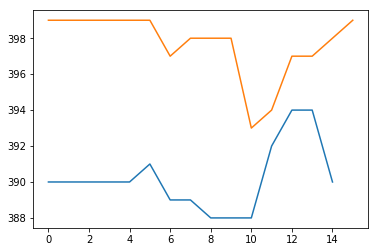

In [30]:
plt.plot(res_signal_min_0)
plt.plot(res_signal_max_0)
plt.show()

# Чем меньше расстояние – тем сильнее сгиб

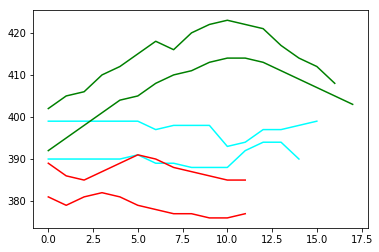

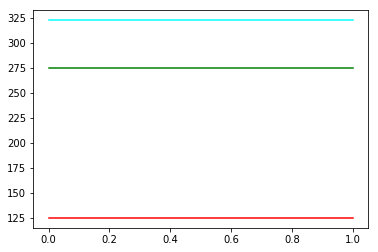

In [34]:
colors = ['r', 'g', "b", "black", "y", "cyan"]
for i, s in enumerate(signals[0:3]):
    res_min, res_max, _, _ = auto_norm(s, 20)
    plt.plot(res_min, c=colors[(i % len(colors)) -1] )
    plt.plot(res_max, c=colors[(i % len(colors)) -1] )
#     plt.plot([bending_dist_base_indexFinger[i] for _ in range(len(res))], c=colors[(i % len(colors)) -1] )
plt.show()

for i, s in enumerate([i for i in range(0, 3)]):
    plt.plot([bending_dist_base_indexFinger[s] for _ in range(2)], c=colors[(i % len(colors)) -1] )
plt.show()

0 3


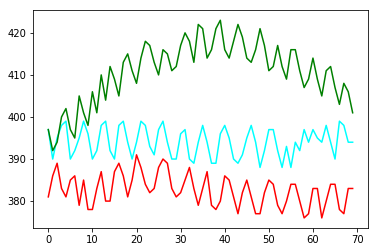

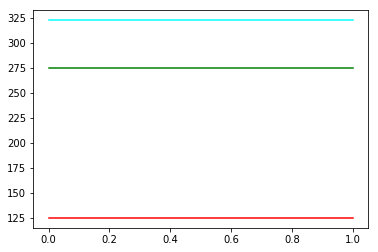

3 6


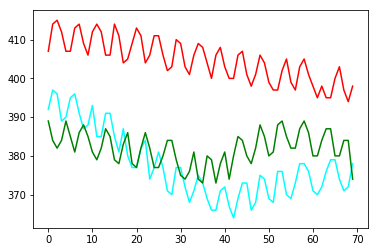

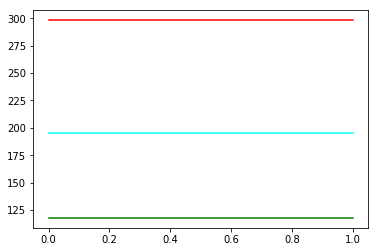

6 9


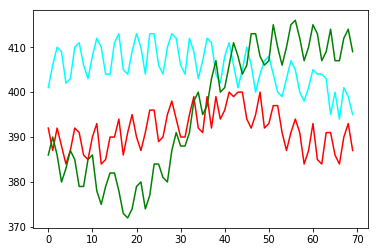

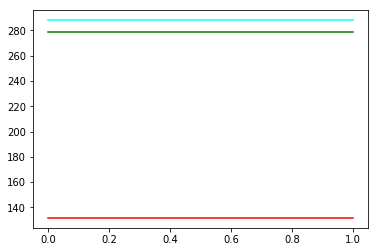

9 12


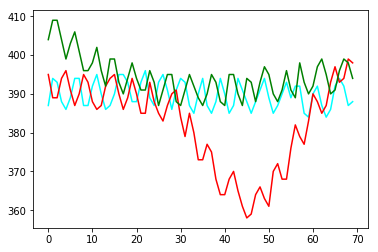

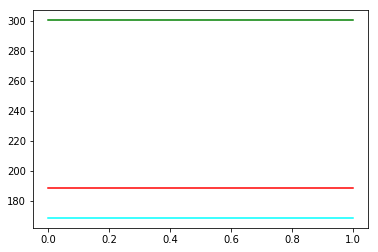

12 15


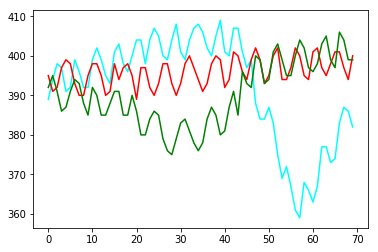

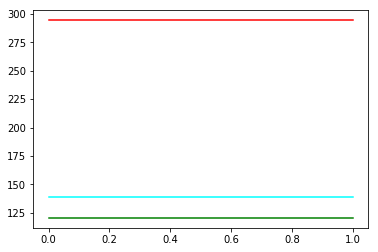

15 18


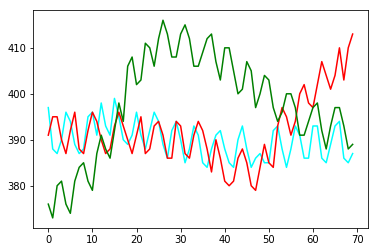

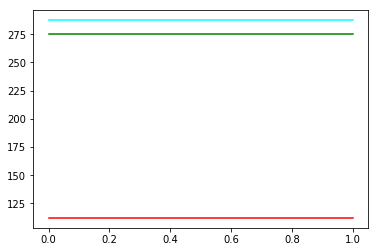

18 21


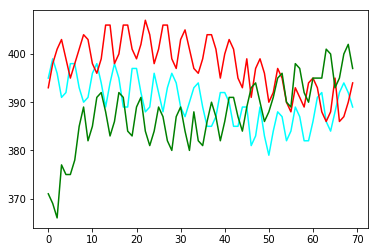

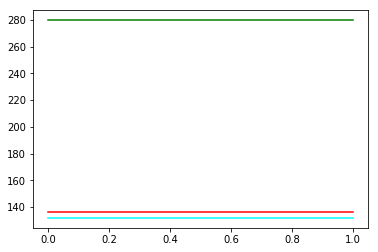

21 24


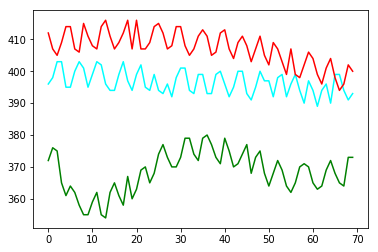

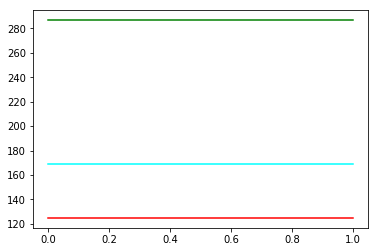

24 27


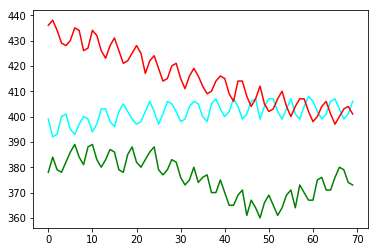

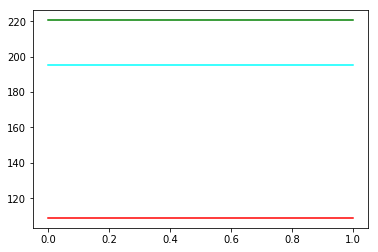

27 30


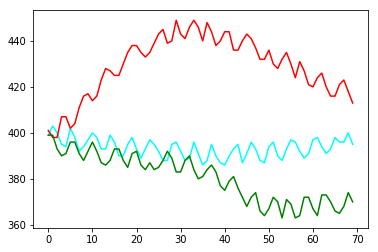

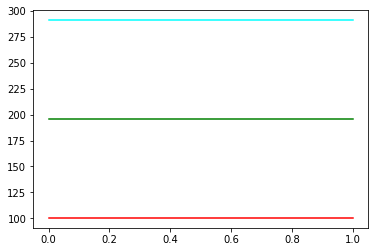

30 33


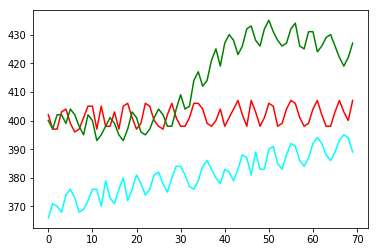

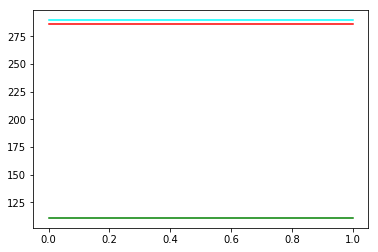

33 36


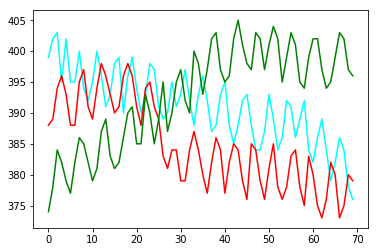

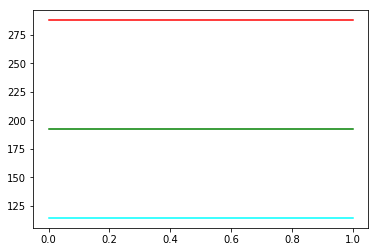

36 39


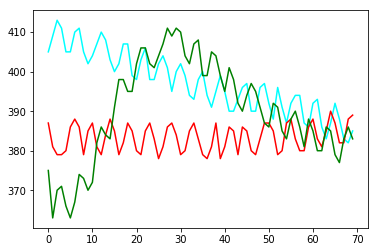

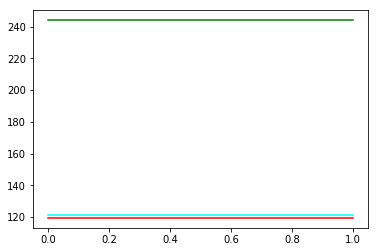

39 42


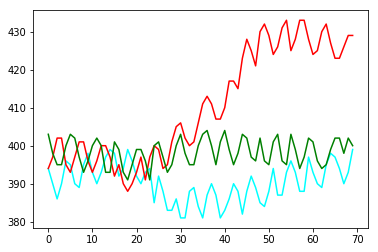

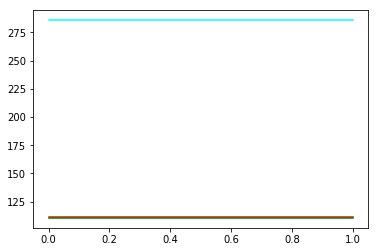

42 45


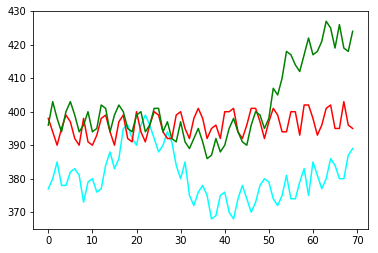

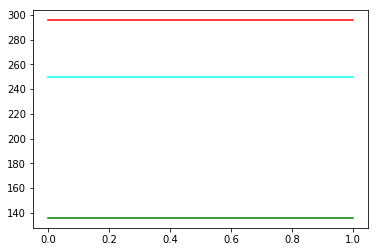

45 48


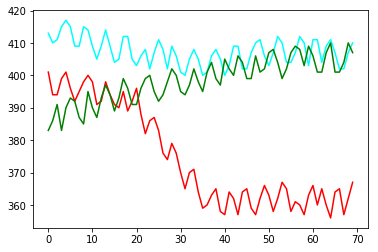

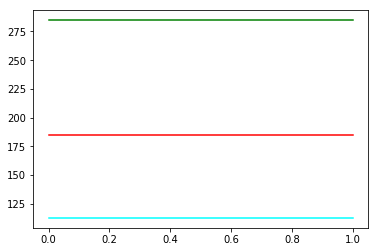

48 51


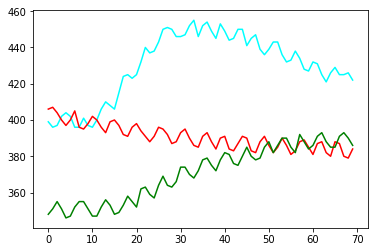

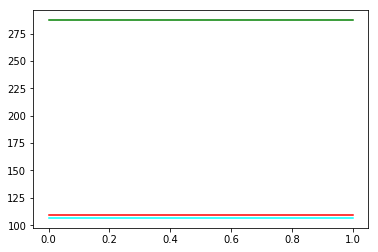

In [35]:
colors = ['r', 'g', "b", "black", "y", "cyan"]
step_size= 3
for step in range(0, len(signals) -step_size, step_size):
    print(step, step+step_size)
    for i, s in enumerate(signals[step:(step+step_size)]):
        res_min, res_max, _, _ = auto_norm(s, 70)
        plt.plot(res_min, c=colors[(i % len(colors)) -1] )
#         plt.plot(res_max, c=colors[(i % len(colors)) -1] )
    #     plt.plot([bending_dist_base_indexFinger[i] for _ in range(len(res))], c=colors[(i % len(colors)) -1] )
    plt.show()

    for i, s in enumerate([i for i in range(step, step+step_size)]):
        plt.plot([bending_dist_base_indexFinger[s] for _ in range(2)], c=colors[(i % len(colors)) -1] )
    plt.show()